### Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

In [39]:
# See the value of multiple statements at once
#output for all commands in python jupyter notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')



## Data info

## Dataset name: Titanic
#### Variable	Definition	Key
#### survival :	0 = No, 1 = Yes
#### pclass	Ticket class:	1 = 1st, 2 = 2nd, 3 = 3rd
#### Gender:Male Female	
#### Age:	Age in years	
#### sibsp	:of siblings / spouses aboard the Titanic	
#### parch	: of parents / children aboard the Titanic	
#### ticket	:Ticket number	
#### fare	:Passenger fare	
#### cabin	:Cabin number	
#### embarked	:Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


#### pclass: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower
#### age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

#### sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
#### parch: The dataset defines family relations in this way...

Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [41]:
Url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"


In [42]:
train  = pd.read_csv(Url)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
train.shape

(891, 12)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [47]:
# variable identification


{'whiskers': [<matplotlib.lines.Line2D at 0x1de67f9afc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1de67fa3ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de67f92a88>],
 'medians': [<matplotlib.lines.Line2D at 0x1de67faea88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de67fb1f88>],
 'means': []}

Text(0.5, 0, 'PassengerId')

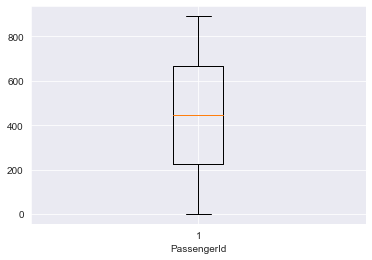

{'whiskers': [<matplotlib.lines.Line2D at 0x1de681ffec8>,
 'caps': [<matplotlib.lines.Line2D at 0x1de68202f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de681ff308>],
 'medians': [<matplotlib.lines.Line2D at 0x1de68209f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de6820eb88>],
 'means': []}

Text(0.5, 0, 'Survived')

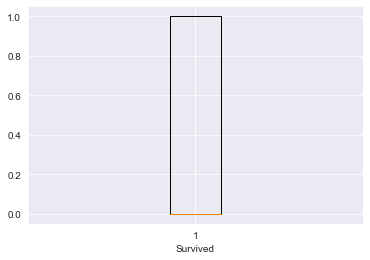

{'whiskers': [<matplotlib.lines.Line2D at 0x1de6827a688>,
 'caps': [<matplotlib.lines.Line2D at 0x1de6827eb08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de682764c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1de68282ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de68286d88>],
 'means': []}

Text(0.5, 0, 'Pclass')

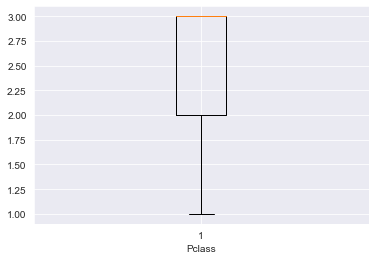

{'whiskers': [<matplotlib.lines.Line2D at 0x1de6813a848>,
 'caps': [<matplotlib.lines.Line2D at 0x1de6812cf48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de681452c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1de6811e1c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de6810f348>],
 'means': []}

Text(0.5, 0, 'Age')

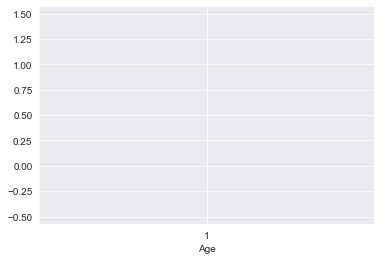

{'whiskers': [<matplotlib.lines.Line2D at 0x1de689ba3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1de689c1188>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de689c9808>],
 'medians': [<matplotlib.lines.Line2D at 0x1de67f4e588>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de67efe908>],
 'means': []}

Text(0.5, 0, 'SibSp')

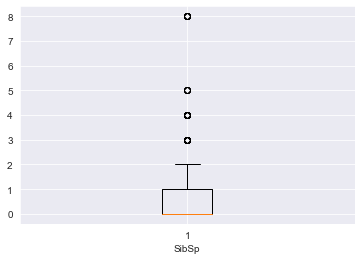

{'whiskers': [<matplotlib.lines.Line2D at 0x1de6788bdc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1de64f117c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de67dc5d48>],
 'medians': [<matplotlib.lines.Line2D at 0x1de661ad5c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de682e5b88>],
 'means': []}

Text(0.5, 0, 'Parch')

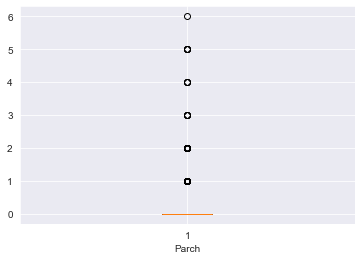

{'whiskers': [<matplotlib.lines.Line2D at 0x1de68379c88>,
 'caps': [<matplotlib.lines.Line2D at 0x1de6837de08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de68376808>],
 'medians': [<matplotlib.lines.Line2D at 0x1de68385c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de68388c08>],
 'means': []}

Text(0.5, 0, 'Fare')

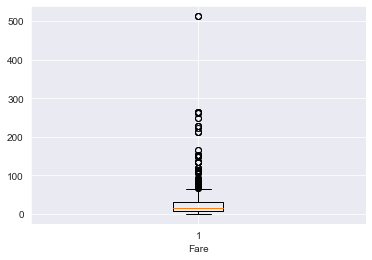

In [48]:
for i in train.select_dtypes(include=['int64','float64']):
    plt.boxplot(train[i])
    plt.xlabel(i)
    plt.show()

Text(0.5, 0, 'PassengerId')

Text(0, 0.5, 'Survived')

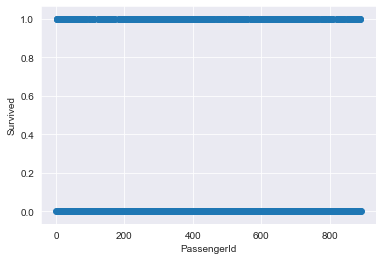

Text(0.5, 0, 'Survived')

Text(0, 0.5, 'Survived')

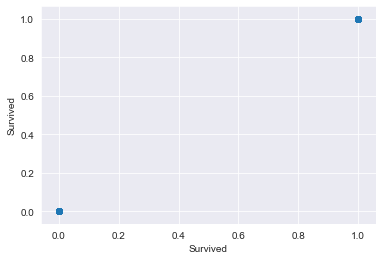

Text(0.5, 0, 'Pclass')

Text(0, 0.5, 'Survived')

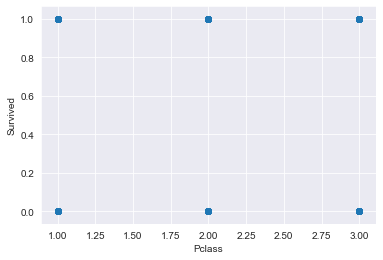

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Survived')

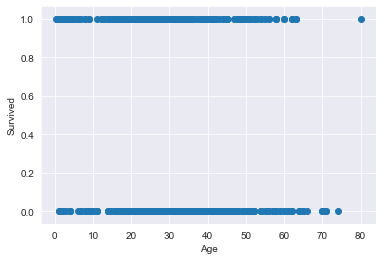

Text(0.5, 0, 'SibSp')

Text(0, 0.5, 'Survived')

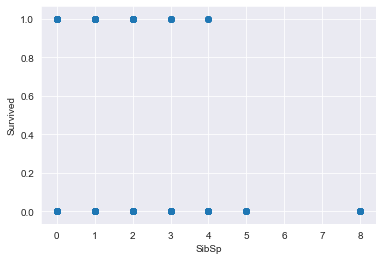

Text(0.5, 0, 'Parch')

Text(0, 0.5, 'Survived')

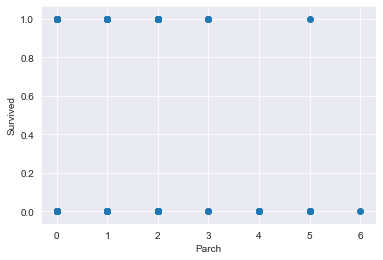

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Survived')

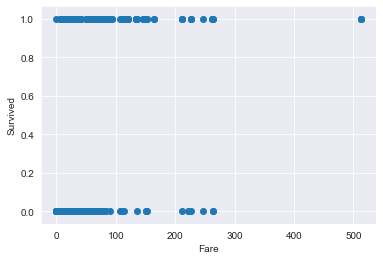

In [49]:
for i in train.select_dtypes(include=['int64','float64']):
    plt.scatter(train[i],train['Survived'])
    plt.xlabel(i)
    plt.ylabel('Survived')
    plt.show()

In [50]:
train['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [51]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

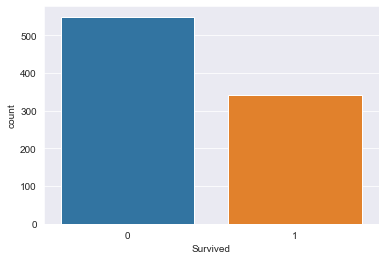

In [52]:
sns.countplot(train['Survived'])

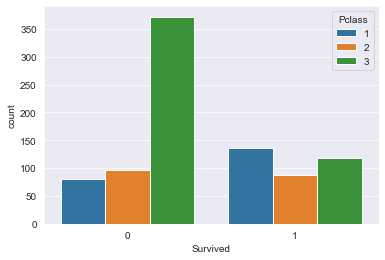

In [53]:
sns.countplot(train['Survived'],hue='Pclass',data = train)

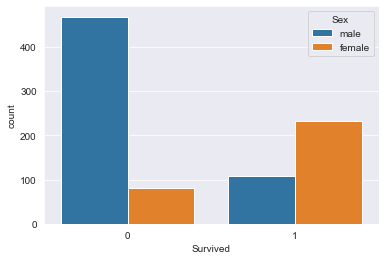

In [54]:
sns.countplot(train['Survived'],hue='Sex',data = train)

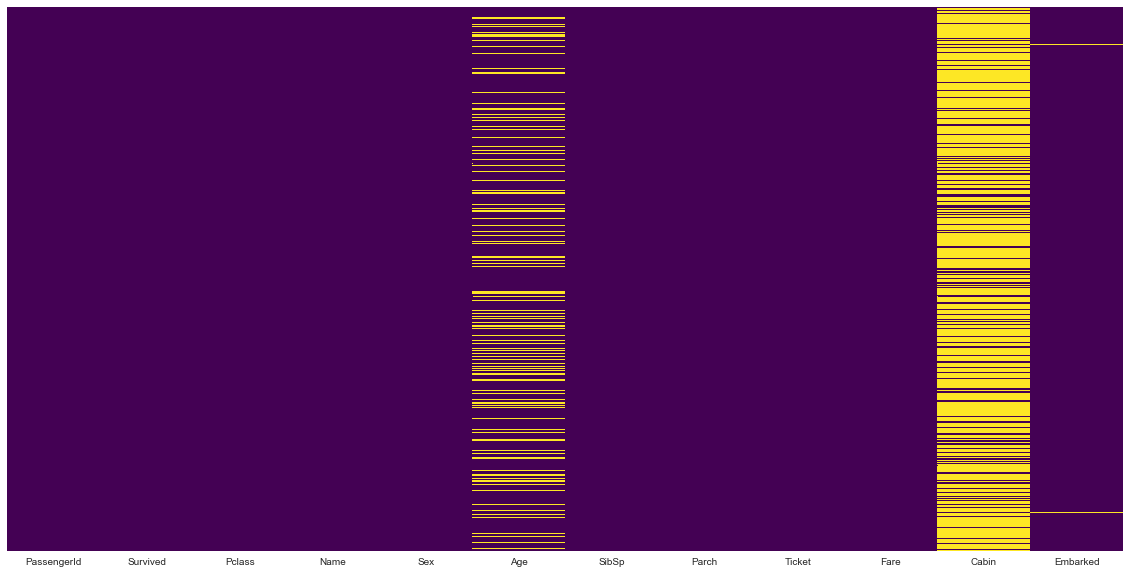

In [55]:
# Check for missing values
plt.figure(figsize=(20,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show();

In [56]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [57]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
(train.isnull().sum()/len(train)*100).round(2).astype('str') + '%'

PassengerId      0.0%
Survived         0.0%
Pclass           0.0%
Name             0.0%
Sex              0.0%
Age            19.87%
SibSp            0.0%
Parch            0.0%
Ticket           0.0%
Fare             0.0%
Cabin           77.1%
Embarked        0.22%
dtype: object

In [59]:
train.drop('Cabin',axis = 1,inplace = True)

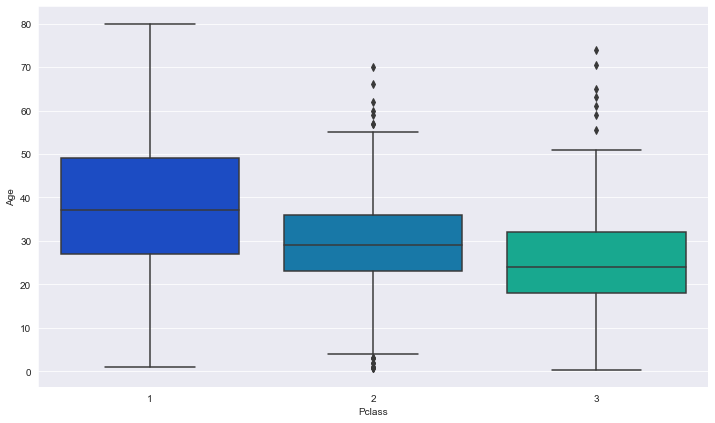

In [60]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter');

In [61]:
# replace or fill missing Age values by PClass.

train['Age'] = train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))


In [62]:
# Drop the 2 rows having NA in Embarked
train.dropna(inplace=True)

In [63]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.032411,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.055278,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.400919,0.081656,0.016824,-0.548193
Age,0.032411,-0.055278,-0.400919,1.000000,-0.242737,-0.174818,0.118050
SibSp,-0.057686,-0.034040,0.081656,-0.242737,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.174818,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.118050,0.160887,0.217532,1.000000


<Figure size 936x720 with 0 Axes>

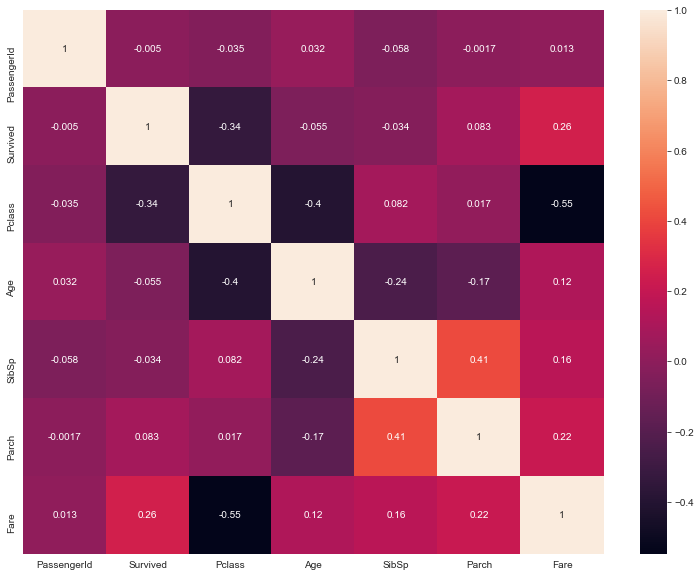

In [64]:
plt.figure(figsize=(13,10))
sns.heatmap(train.corr(),annot=True)

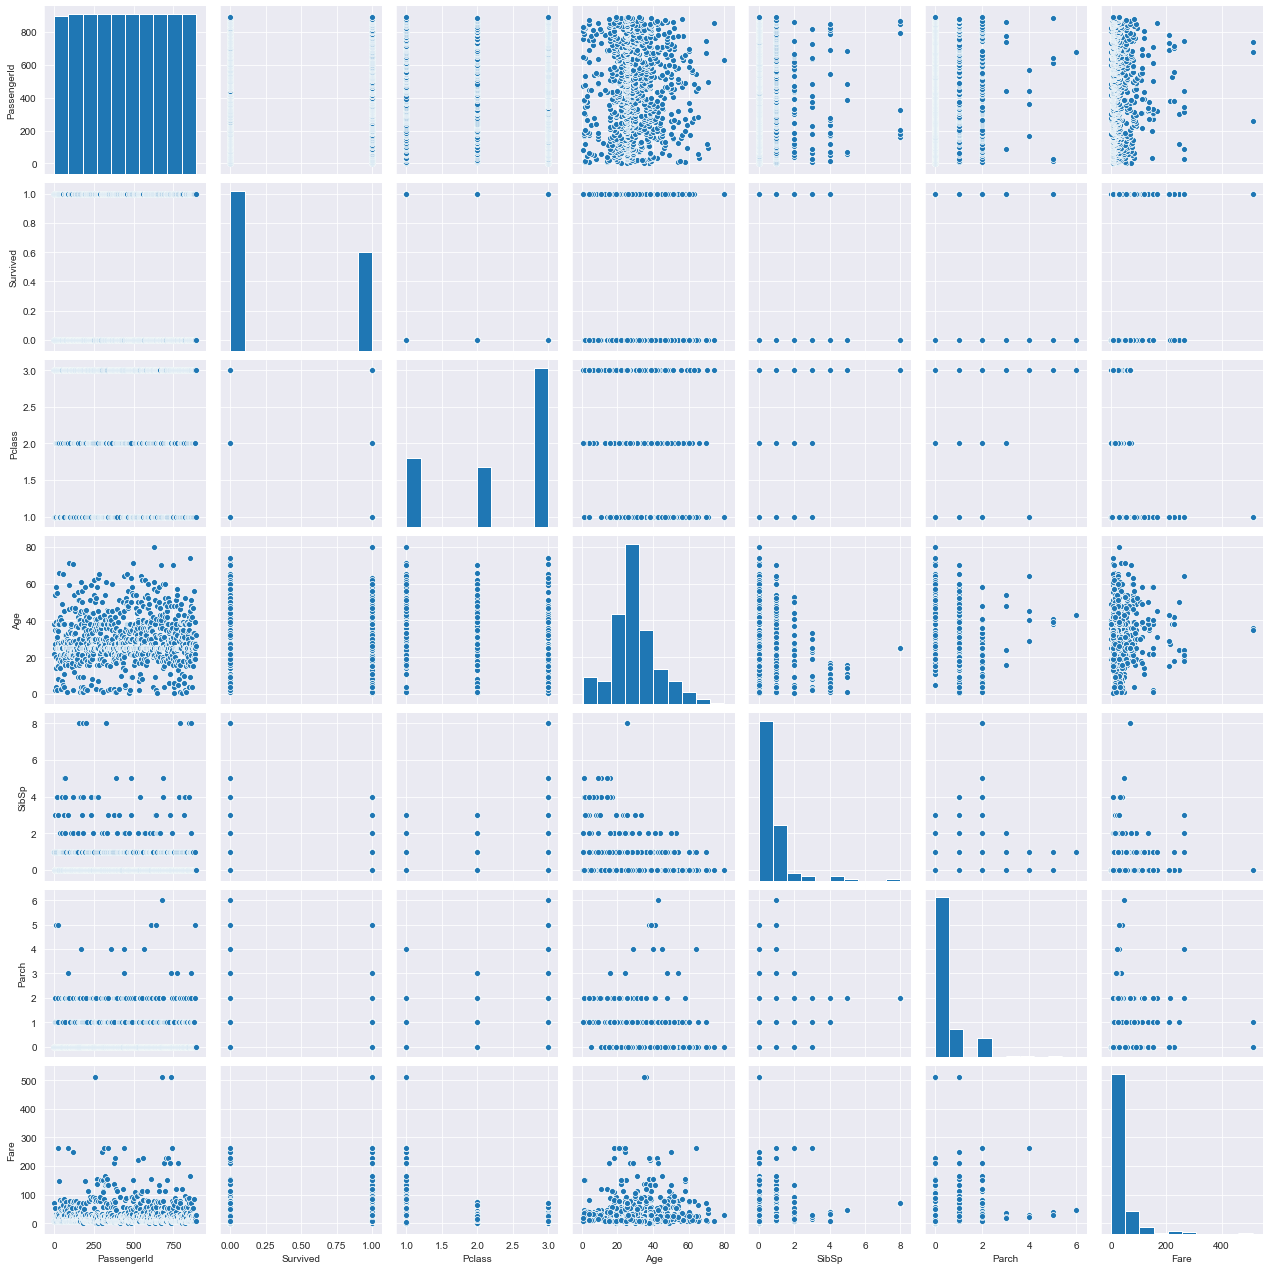

In [65]:
sns.pairplot(train)

In [66]:
pd.get_dummies(train['Sex'])
pd.get_dummies(train['Sex'],drop_first=True,)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [67]:
pd.get_dummies(train['Embarked'])
pd.get_dummies(train['Embarked'],drop_first=True)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [69]:
gender = pd.get_dummies(train['Sex'],prefix='Sex',drop_first=True)
embark = pd.get_dummies(train['Embarked'],prefix='Embarked',drop_first=True)

In [70]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [71]:
train = pd.concat([train,gender,embark],axis = 1)

In [72]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


In [73]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True) # drop unnecessary columns
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [74]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], 
                                                    test_size=0.30,random_state=101)

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model=dt.fit(X_train,y_train)

# generate predictions
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [76]:
predict_train=model.predict(X_train)
predict_test = model.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc

In [79]:
print('Train:',accuracy_score(predict_train,y_train))
print('Test:',accuracy_score(predict_test,y_test))

Train: 0.9887459807073955
Test: 0.7790262172284644


In [80]:
print('Train:',classification_report(predict_train,y_train))
print('Test:',classification_report(predict_test,y_test))

Train:               precision    recall  f1-score   support

           0       1.00      0.98      0.99       391
           1       0.97      1.00      0.99       231

    accuracy                           0.99       622
   macro avg       0.99      0.99      0.99       622
weighted avg       0.99      0.99      0.99       622

Test:               precision    recall  f1-score   support

           0       0.83      0.81      0.82       168
           1       0.69      0.73      0.71        99

    accuracy                           0.78       267
   macro avg       0.76      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



In [81]:
cm = pd.DataFrame(confusion_matrix(predict_test,y_test))

<Figure size 576x360 with 0 Axes>

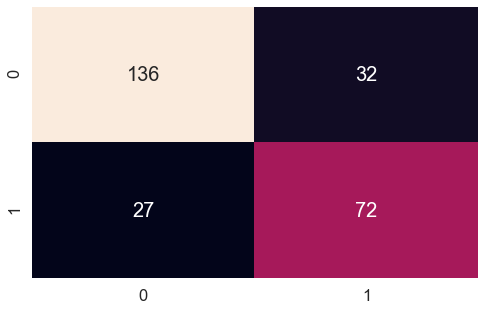

In [82]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1.5) # for label size
sns.heatmap(cm,annot=True, fmt='g',annot_kws={"size":20},cbar=False) 

In [83]:
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_train, predictions_train)

FPR1, TPR1, _1 = roc_curve(y_test, predictions_test)

In [84]:
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )

roc_auc1 = auc(FPR1, TPR1)
print ('ROC AUC: %0.3f' % roc_auc1 )

ROC AUC: 0.986
ROC AUC: 0.763


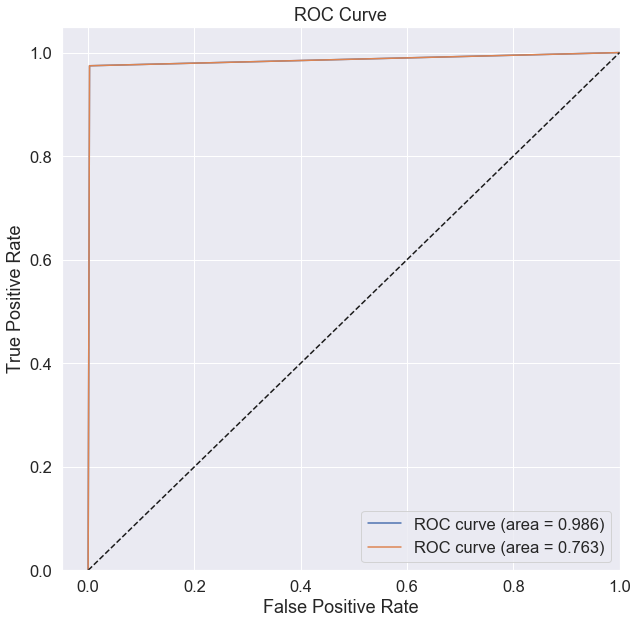

In [85]:
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show();

In [86]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,train.drop('Survived',axis=1),train['Survived'], cv=5) 
scores

array([0.73033708, 0.76404494, 0.81460674, 0.75842697, 0.8079096 ])